In [1]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os
from utils.config import random_sample,seed

In [2]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 40
TOPN = 10
model_type = "lda"
model_name="LDA"
data_type = "np_mini_stopwords"
passes = 1000
decay = 0.5
embedding_model = f"embedding_p{passes}_t{NUM_TOPICS}"
experiment="embedding"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"

df = load_from_file(folder_path_data,file_name_data)
folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)





In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [4]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                     random_state=42,
                                     passes=passes,
                                     decay=decay,
                                      )
    LdaMulticore.save(lda, file_path)

In [5]:
lda.get_topics()

array([[3.7880021e-04, 3.7835432e-06, 1.5448322e-04, ..., 3.7835432e-06,
        3.7835432e-06, 3.7835432e-06],
       [5.1944773e-04, 5.4338902e-06, 5.4338902e-06, ..., 5.4338902e-06,
        5.4338902e-06, 5.4338902e-06],
       [8.1947337e-06, 8.1947337e-06, 8.1947337e-06, ..., 8.1947337e-06,
        8.1947337e-06, 8.1947337e-06],
       ...,
       [3.0598693e-04, 6.4513201e-06, 6.4513201e-06, ..., 6.4513201e-06,
        6.4513201e-06, 6.4513201e-06],
       [2.5537296e-04, 3.8938360e-06, 3.8938360e-06, ..., 3.8938360e-06,
        3.8938360e-06, 3.8938360e-06],
       [4.6736959e-06, 4.6736959e-06, 4.6736959e-06, ..., 4.6736959e-06,
        4.6736959e-06, 4.6736959e-06]], dtype=float32)

In [6]:
lda.get_topic_terms(0,5)

[(2231, 0.006378906),
 (2786, 0.0056548547),
 (107, 0.0048131095),
 (339, 0.004630593),
 (557, 0.0043180566)]

In [7]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [8]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [9]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(21,
  '0.012*"skolen" + 0.006*"høyre" + 0.006*"elevene" + 0.005*"forhold" + '
  '0.005*"elever" + 0.005*"bedre" + 0.004*"lærere" + 0.004*"forslag" + '
  '0.004*"skole" + 0.004*"behov"'),
 (29,
  '0.009*"gjelder" + 0.007*"jernbane" + 0.005*"toget" + 0.005*"representanten" '
  '+ 0.005*"jernbanen" + 0.004*"byene" + 0.004*"forhold" + 0.003*"forbindelse" '
  '+ 0.003*"regjering" + 0.003*"rad"'),
 (2,
  '0.005*"spørsmalet" + 0.005*"landene" + 0.004*"offentlige" + 0.003*"private" '
  '+ 0.003*"system" + 0.003*"forslag" + 0.003*"internasjonale" + '
  '0.003*"avisene" + 0.003*"gjelder" + 0.003*"arbeidet"'),
 (14,
  '0.036*"kommunene" + 0.015*"kommuner" + 0.009*"ønsker" + 0.008*"regjeringen" '
  '+ 0.008*"penger" + 0.007*"kommune" + 0.007*"gjelder" + 0.007*"staten" + '
  '0.005*"mate" + 0.004*"kommunen"'),
 (31,
  '0.022*"stortinget" + 0.016*"forslag" + 0.014*"regjeringen" + '
  '0.013*"representanten" + 0.012*"saken" + 0.012*"sv" + 0.011*"gjelder" + '
  '0.010*"ønsker" + 0.008*"forslaget" + 

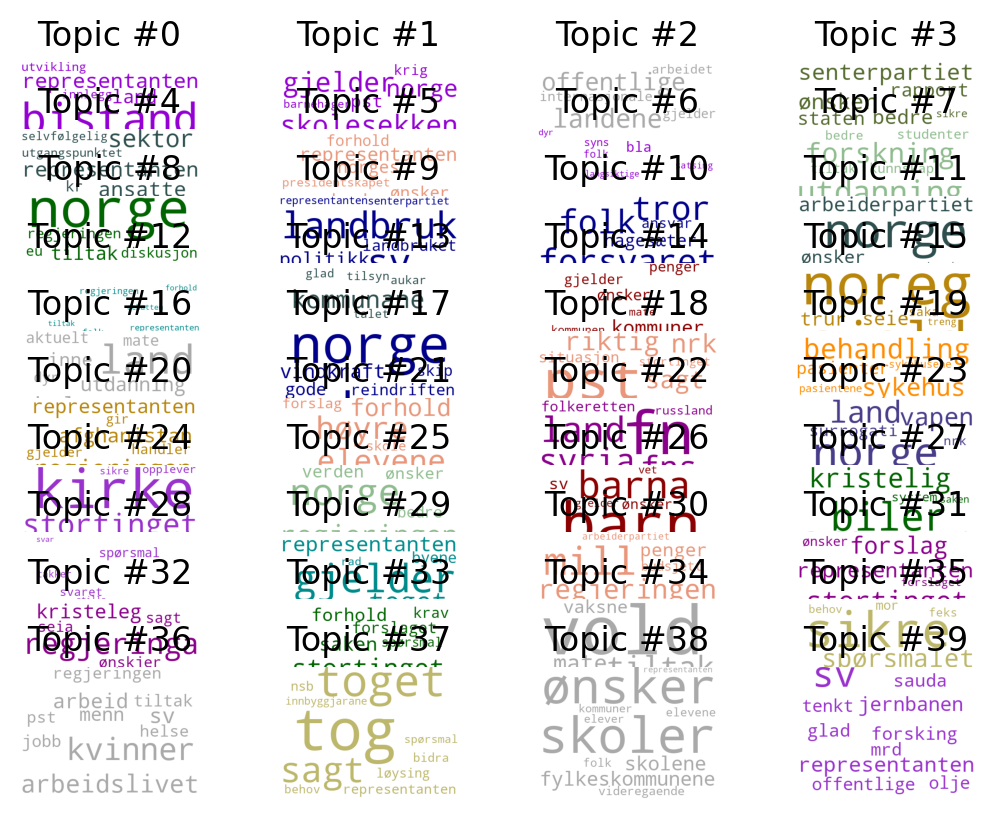

In [10]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

In [11]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(formatted_topics)

[{'israel': 0.006378906, 'bistand': 0.0056548547, 'representanten': 0.0048131095, 'pst': 0.004630593, 'land': 0.0043180566, 'krig': 0.0038284143, 'utvikling': 0.0035372006, 'usa': 0.003329235, 'innlegg': 0.0032075646, 'bistanden': 0.0031808366}, {'kommunene': 0.0061780163, 'skolesekken': 0.0052210847, 'gjelder': 0.0051666982, 'kulturelle': 0.005149588, 'norge': 0.003946119, 'forhold': 0.0035969927, 'pst': 0.003529309, 'regjeringa': 0.0031575335, 'krig': 0.0030321728, 'barnehager': 0.0029042829}, {'spørsmalet': 0.005471327, 'landene': 0.0047574276, 'offentlige': 0.004122058, 'private': 0.0033762953, 'system': 0.0032032682, 'forslag': 0.003112296, 'internasjonale': 0.0029308014, 'avisene': 0.002889144, 'gjelder': 0.0026420404, 'arbeidet': 0.0025402817}, {'norge': 0.0044513913, 'senterpartiet': 0.004271238, 'ønsker': 0.0040706894, 'gjelder': 0.0040539554, 'bedre': 0.0034198149, 'trenger': 0.003052381, 'rapport': 0.0029588528, 'staten': 0.002904832, 'representanten': 0.0028403073, 'sikre':

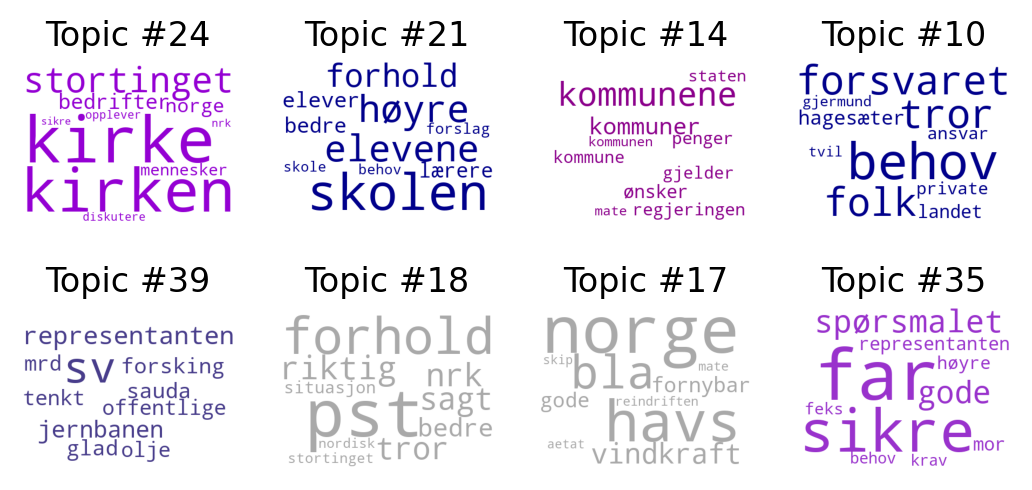

In [12]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [13]:
from utils.tables_and_plots import create_wordcloud

file_name_model = "wordcloud"
print(file_name)

for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    full_wordcloud_folder_path = os.path.join(ROOT_PATH, folder_path_word_cloud)
    #full_wordcloud_file_path = os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png"))
    if not os.path.exists(full_wordcloud_folder_path):
        os.mkdir(full_wordcloud_folder_path)
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))

lda_embedding_p1000_t40_np_mini_stopwords


In [14]:
lda.show_topic(1)

[('kommunene', 0.0061780163),
 ('skolesekken', 0.0052210847),
 ('gjelder', 0.0051666982),
 ('kulturelle', 0.005149588),
 ('norge', 0.003946119),
 ('forhold', 0.0035969927),
 ('pst', 0.003529309),
 ('regjeringa', 0.0031575335),
 ('krig', 0.0030321728),
 ('barnehager', 0.0029042829)]

In [15]:
# Save topic words of model to file

topics = lda.show_topics(num_topics = NUM_TOPICS,num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))




write_topics_file(folder_path_topics, file_name, topic_words)

In [16]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [17]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [18]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [19]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('offentlig', 'sektor') wordtuple
('offentlig', 'sektor') wordup
372.0 over
54243.0 under
-7.187990539788729 -8.539158811108031 0.841767988954409 ('offentlig', 'sektor') 372 287 189
('offentlig', 'representanten') wordtuple
('offentlig', 'representanten') wordup
106.0 over
465801.0 under
-12.10143375666046 -6.727920454563199 1.7986885900906702 ('offentlig', 'representanten') 106 287 1623
('ansatte', 'offentlig') wordtuple
('ansatte', 'offentlig') wordup
144.0 over
47642.0 under
-8.3700213565803 -7.169925001442313 1.1673792061836874 ('ansatte', 'offentlig') 144 287 166
('administrasjon', 'offentlig') wordtuple
('administrasjon', 'offentlig') wordup
107.0 over
7749.0 under
-6.178327442438009 -6.7414669864011465 0.9164663202980746 ('administrasjon', 'offentlig') 107 287 27
('offentlig', 'tror') wordtuple
('offentlig', 'tror') wordup
138.0 over
328902.0 under
-11.218773798654425 -7.10852445677817 1.578214138091207 ('offentlig', 'tror') 138 287 1146
('offentlig', 'offentlige') wordtuple


In [20]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.09863882617335185


In [21]:
print(diversity)
print(coherence)

0.79
1.5556976568455


In [22]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                     │ Metric    │   Value │
╞═══════════════════════════════════════════╪═══════════╪═════════╡
│ lda_embedding_p1000_t40_np_mini_stopwords │ coherence │  1.5557 │
├───────────────────────────────────────────┼───────────┼─────────┤
│ lda_embedding_p1000_t40_np_mini_stopwords │ diversity │  0.79   │
╘═══════════════════════════════════════════╧═══════════╧═════════╛


In [23]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})